## Tutorial 1: First steps

Welcome to this tutorial.

# Importing libraries

Let's start by importing some libraries. If you have installed meltPT correctly, this should work!

In [1]:
from meltPT import *
import pyMelt as m
import matplotlib.pyplot as plt

# Reading data and initialising the Suite object

Start by importing data from your csv. In this case our data are stored in a file called "PF16_UT09DV04.csv". To keep this example simple, the input infile contains a single sample, UT09DV04, from Plank & Forsyth (2016). If necessary, please edit the path within Suite so that the csv file can be found.

# Backtrack compositions

The next step is backtracking the sample's composition. The aim here is to account for the effects of fractional crystallisation of olivine and estimate the sample's "primary" composition: i.e., its composition when it last equilibrated with the mantle. To do so, use the Suite's backtrack_compositions method. Here we have set the verbose flag to True, so program will print updates at each interation.

In [2]:
s = Suite("Data/PF16_UT09DV04.csv", src_FeIII_totFe=0.17)

/home/mcnab/Melting/meltPT/meltPT/parse.py:75: UserWarning: Input csv does not contain a Fe2O3 column: we will try to fill it for you, or set it to zero.
  warnings.warn(message)
/home/mcnab/Melting/meltPT/meltPT/parse.py:75: UserWarning: Input csv does not contain a Cr2O3 column: we will try to fill it for you, or set it to zero.
  warnings.warn(message)
/home/mcnab/Melting/meltPT/meltPT/parse.py:75: UserWarning: Input csv does not contain a NiO column: we will try to fill it for you, or set it to zero.
  warnings.warn(message)
/home/mcnab/Melting/meltPT/meltPT/parse.py:75: UserWarning: Input csv does not contain a CoO column: we will try to fill it for you, or set it to zero.
  warnings.warn(message)
/home/mcnab/Melting/meltPT/meltPT/parse.py:75: UserWarning: Input csv does not contain a CO2 column: we will try to fill it for you, or set it to zero.
  warnings.warn(message)
/home/mcnab/Melting/meltPT/meltPT/parse.py:75: UserWarning: Input csv does not contain a FeO_tot column: we wil

You have now created an instance of meltPT's Suite class, containing the sample data. Parsing the data to the dataframe throws up a series of errors since the dataset does not contain Fe2O3, Cr2O3, NiO, CoO, CO2 or FeO_tot columns. However, since we calculate Fe2O3 and FeO_tot from our FeO column and since our chosen thermobarometric scheme does not include Cr2O3, NiO, CoO and CO2 we can ignore these warnings. Data are stored in a pandas dataframe, which you can preview by typing:

In [3]:
print(s.data)

  Volc Field       Vent tephra/lava/MI      Sample       IGSN  Latitude  \
0       SCVF  Diamond V      tephra/MI  UT-09 DV04  TAP00001C   37.2571   

   Longitude       SiO2     TiO2      Al2O3  ...   Th    U     Fe2O3  \
0  -113.6243  47.666258  1.85866  15.292146  ...  2.6  1.6  2.095933   

      Cr2O3       NiO  CoO  CO2  FeO_tot  src_FeIII_totFe  Total  
0  0.030731  0.020911  0.0  0.0    11.28             0.17  100.0  

[1 rows x 48 columns]


In [4]:
s.backtrack_compositions(Kd=0.3, verbose=True, target_Fo=0.9)

Backtracking sample UT-09 DV04 to primary composition:
    - 0.05% olivine added, melt Fo = 0.8498, Kd = 0.3000.
    - 0.10% olivine added, melt Fo = 0.8501, Kd = 0.3000.
    - 0.15% olivine added, melt Fo = 0.8503, Kd = 0.3000.
    - 0.20% olivine added, melt Fo = 0.8505, Kd = 0.3000.
    - 0.25% olivine added, melt Fo = 0.8507, Kd = 0.3000.
    - 0.30% olivine added, melt Fo = 0.8510, Kd = 0.3000.
    - 0.35% olivine added, melt Fo = 0.8512, Kd = 0.3000.
    - 0.40% olivine added, melt Fo = 0.8514, Kd = 0.3000.
    - 0.45% olivine added, melt Fo = 0.8517, Kd = 0.3000.
    - 0.50% olivine added, melt Fo = 0.8519, Kd = 0.3000.
    - 0.55% olivine added, melt Fo = 0.8521, Kd = 0.3000.
    - 0.60% olivine added, melt Fo = 0.8523, Kd = 0.3000.
    - 0.65% olivine added, melt Fo = 0.8526, Kd = 0.3000.
    - 0.70% olivine added, melt Fo = 0.8528, Kd = 0.3000.
    - 0.74% olivine added, melt Fo = 0.8530, Kd = 0.3000.
    - 0.79% olivine added, melt Fo = 0.8532, Kd = 0.3000.
    - 0.84% olivi

As you can see, the sample started with a Forsterite number of c. 0.85. The program then added olivine in equilibrium with the melt, until, after adding c. 14% olivine, it reached a Forsterite number of 90%, which we assumed for the mantle source.

You have now created a new dataframe within the suite class containing the sample's primary composition:

In [5]:
print(s.primary)

   Al2O3_primary_wt  CO2_primary_wt  CaO_primary_wt  CoO_primary_wt  \
0         13.044663             0.0        7.382189             0.0   

   Cr2O3_primary_wt  Fe2O3_primary_wt  FeO_primary_wt  H2O_primary_wt  \
0          0.026214          1.787895        9.582655        1.174439   

   K2O_primary_wt  MgO_primary_wt  MnO_primary_wt  Na2O_primary_wt  \
0        0.939551       14.481938        0.150999         2.885765   

   NiO_primary_wt  P2O5_primary_wt  SiO2_primary_wt  TiO2_primary_wt  ol_added  
0        0.017838         0.327165        46.613197         1.585493  0.137187  


# Compute pressures & temperatures

Now we can calculate pressures and temperatures at which the sample was last in equilibrium with the mantle. Use Suite's compute_pressure_temperature method:

In [6]:
s.compute_pressure_temperature(method="PF16")

The results are stored in a new dataframe:

In [7]:
print(s.PT)

          P  P_err            T  T_err
0  2.069507   0.24  1370.081495   39.0


The calculated pressure of 2.07 GPa and temperature of 1370 oC are the same as those from Plank & Forsyth (2016, their Table S8), which is good!


# Fit a melting path

Next we would like to link our estimate equilibration pressure and temperature to a model geotherm. In meltPT, we make use of the pyMelt package to compute adiabatic decompression melting paths. For this example we use pyMelt's implientation of Katz et al.'s (2003) lherzolite melting model to set up the mantle object.

In [8]:
lz = m.lithologies.katz.lherzolite()
mantle = m.mantle([lz], [1], ['Lz'])

We can now pass our mantle object to Suite's find_individual_potential_temperatures method. This will take a few seconds!

In [9]:
s.find_individual_potential_temperatures(mantle)

This will create a new dataframe, called individual_potential_temperatures which contains information about the result and a copy of the best-fitting pyMelt path object:

In [10]:
print(s.individual_potential_temperatures)

          F         P            T           Tp   misfit  \
0  0.035642  2.069513  1370.082615  1346.652044  0.00004   

                                                path  
0  <pyMelt.meltingcolumn_classes.meltingColumn ob...  


# Variable K<sub>d</sub>

In the above example we used a fixed value for the partition coefficient that describes partitioning between olivine and melt, Kd. There is also an option to allow this value to vary as a function of melt Mg#, after Tamura et al. (2020, JoP). Let's repeat the steps above with this option.

In [11]:
# Read the csv, create a new Suite object.
s_varKd = Suite("./Data/PF16_UT09DV04.csv", src_FeIII_totFe=0.17)

# Backtrack. Variable Kd is the default option, so we can simply miss out that
# flag. Notice that in this case, we need to add more olivine, about 17%, to
# reach our target forsterite content.
s_varKd.backtrack_compositions(verbose=True, target_Fo=0.9)

# Compute pressure and temperature. The result is hotter and deeper than the
# fixed Kd case.
s_varKd.compute_pressure_temperature(method="PF16")
print(s.PT)

# Find the best fitting potential temperature.
s_varKd.find_individual_potential_temperatures(mantle)

Backtracking sample UT-09 DV04 to primary composition:
    - 0.05% olivine added, melt Fo = 0.8505, Kd = 0.2984.
    - 0.10% olivine added, melt Fo = 0.8507, Kd = 0.2985.
    - 0.15% olivine added, melt Fo = 0.8509, Kd = 0.2986.
    - 0.20% olivine added, melt Fo = 0.8511, Kd = 0.2987.
    - 0.25% olivine added, melt Fo = 0.8513, Kd = 0.2987.
    - 0.30% olivine added, melt Fo = 0.8515, Kd = 0.2988.
    - 0.35% olivine added, melt Fo = 0.8517, Kd = 0.2989.
    - 0.40% olivine added, melt Fo = 0.8519, Kd = 0.2990.
    - 0.45% olivine added, melt Fo = 0.8521, Kd = 0.2991.
    - 0.50% olivine added, melt Fo = 0.8522, Kd = 0.2992.
    - 0.55% olivine added, melt Fo = 0.8524, Kd = 0.2992.
    - 0.60% olivine added, melt Fo = 0.8526, Kd = 0.2993.
    - 0.65% olivine added, melt Fo = 0.8528, Kd = 0.2994.
    - 0.70% olivine added, melt Fo = 0.8530, Kd = 0.2995.
    - 0.74% olivine added, melt Fo = 0.8532, Kd = 0.2996.
    - 0.79% olivine added, melt Fo = 0.8534, Kd = 0.2996.
    - 0.84% olivi

/home/mcnab/Melting/meltPT/meltPT/parse.py:75: UserWarning: Input csv does not contain a Fe2O3 column: we will try to fill it for you, or set it to zero.
  warnings.warn(message)
/home/mcnab/Melting/meltPT/meltPT/parse.py:75: UserWarning: Input csv does not contain a Cr2O3 column: we will try to fill it for you, or set it to zero.
  warnings.warn(message)
/home/mcnab/Melting/meltPT/meltPT/parse.py:75: UserWarning: Input csv does not contain a NiO column: we will try to fill it for you, or set it to zero.
  warnings.warn(message)
/home/mcnab/Melting/meltPT/meltPT/parse.py:75: UserWarning: Input csv does not contain a CoO column: we will try to fill it for you, or set it to zero.
  warnings.warn(message)
/home/mcnab/Melting/meltPT/meltPT/parse.py:75: UserWarning: Input csv does not contain a CO2 column: we will try to fill it for you, or set it to zero.
  warnings.warn(message)
/home/mcnab/Melting/meltPT/meltPT/parse.py:75: UserWarning: Input csv does not contain a FeO_tot column: we wil

# Plotting

Now let's make a nice plot of our result!

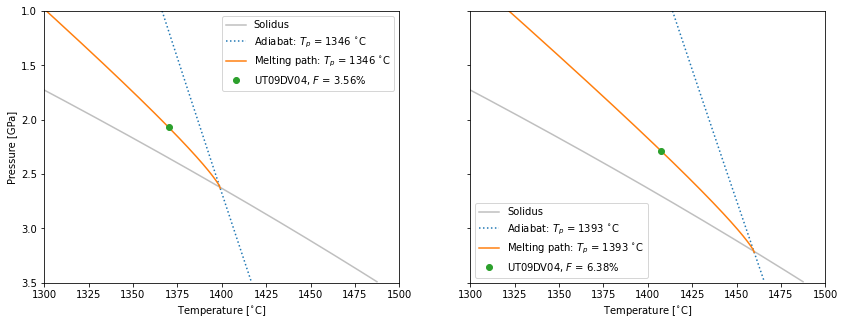

In [12]:
# Initialise seperate plots for the fixed and variable Kd axes.
fig, axs = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(14,5))

# Set up pressure array.
P = np.arange(1., 3.5, 0.01)

# Plot the solidus.
axs[0].plot(lz.TSolidus(P), P, c="0.75", label="Solidus")
axs[1].plot(lz.TSolidus(P), P, c="0.75", label="Solidus")

# Plot an adiabat corresponding to the best-fitting potential temperature
adiabat_label = r"Adiabat: $T_p$ = %i $^{\circ}$C" % s.individual_potential_temperatures.iloc[0]['Tp']
axs[0].plot(
    mantle.adiabat(
        P, 
        s.individual_potential_temperatures.iloc[0]['Tp']), 
    P, ":", label=adiabat_label)
adiabat_label = r"Adiabat: $T_p$ = %i $^{\circ}$C" % s_varKd.individual_potential_temperatures.iloc[0]['Tp']
axs[1].plot(
    mantle.adiabat(
        P, 
        s_varKd.individual_potential_temperatures.iloc[0]['Tp']), 
    P, ":", label=adiabat_label)
    
# Plot melt path corresponding to best-fitting potential temperature
melt_label = r"Melting path: $T_p$ = %i $^{\circ}$C" % s.individual_potential_temperatures.iloc[0]['Tp']
axs[0].plot(
    s.individual_potential_temperatures.iloc[0].path.T, 
    s.individual_potential_temperatures.iloc[0].path.P,
    label=melt_label)
melt_label = r"Melting path: $T_p$ = %i $^{\circ}$C" % s_varKd.individual_potential_temperatures.iloc[0]['Tp']
axs[1].plot(
    s_varKd.individual_potential_temperatures.iloc[0].path.T, 
    s_varKd.individual_potential_temperatures.iloc[0].path.P,
    label=melt_label)
    
# Plot our sample!
sample_label = r"UT09DV04, $F$ = %.2f%%" % (s.individual_potential_temperatures.iloc[0]['F']*100.)
axs[0].plot(s.PT['T'], s.PT['P'], "o", label=sample_label)
sample_label = r"UT09DV04, $F$ = %.2f%%" % (s_varKd.individual_potential_temperatures.iloc[0]['F']*100.)
axs[1].plot(s_varKd.PT['T'], s_varKd.PT['P'], "o", label=sample_label)

# Do some formatting and reveal
for ax in axs:
    ax.set_xlabel(r"Temperature [$^{\circ}$C]")
    ax.set_xlim(1300., 1500.)
    ax.set_ylim(1., 3.5)
    ax.legend()
    ax.invert_yaxis()
axs[0].set_ylabel(r"Pressure [GPa]")
plt.show()